<a href="https://colab.research.google.com/github/tacinunesc/PICO_COLAB/blob/main/PICO_MIC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

APRENDIZAGEM DE M√ÅQUINA

Inicialmente foi foi importa a biblioteca **numpy** utilizada para manipular dados bin√°rios do a√∫dio e a biblioteca **wave** para ler e escrever arquivos *.wav*.

Depois, foram definidos os par√¢metros do audio, carregou o arquivo *.raw*, que √© arquivo gerado na pico para audio, logo ap√≥s calculou a dura√ß√£o do a√∫dio para obter em segundos, por fim coverteu e criou o arquivo wav.





In [66]:
import numpy as np
import wave

# Par√¢metros do √°udio
sample_rate = 16000         # 16.000 amostras por segundo
num_channels = 1            # Mono
sample_width = 2            # 2 bytes = 16 bits

# Carrega o arquivo RAW como int16
raw_data = np.fromfile("audio3.raw", dtype=np.int16)

# Verifica dura√ß√£o do √°udio
num_samples = len(raw_data)
duration_seconds = num_samples / sample_rate

if duration_seconds < 1.0:
    print(f"Aten√ß√£o: o √°udio tem apenas {duration_seconds:.2f} segundos.")
else:
    print(f"Dura√ß√£o do √°udio: {duration_seconds:.2f} segundos.")

# Salva como WAV
with wave.open("audio3.wav", "w") as wav_file:
    wav_file.setnchannels(num_channels)
    wav_file.setsampwidth(sample_width)
    wav_file.setframerate(sample_rate)
    wav_file.writeframes(raw_data.tobytes())





Dura√ß√£o do √°udio: 1.00 segundos.


VISUALIZA√á√ÉO DO AUDIO

In [68]:
raw_data = np.fromfile("audio3.raw", dtype=np.int16)

from IPython.display import Audio
Audio("audio3.wav")


REMO√á√ÉO DE RU√çDOS

Inicialmente, instala a biblioteca **noisereduce** que reduz o ruido dos a√∫dios, **librosa** que carrega e processa arquivos de a√∫dio e **soundfile** que salva o audio limpo em formato *.wav*, ent√£o nesta realizar√° a remo√ß√£o dos ru√≠dos dos a√∫dios.

In [70]:
!pip install noisereduce

import noisereduce as nr
import librosa
import soundfile as sf

# Carrega o √°udio WAV
y, sr = librosa.load("audio3.wav", sr=None)

# Usa os primeiros 0.5s como perfil de ru√≠do
noise_clip = y[0:int(0.5 * sr)]
y_denoised = nr.reduce_noise(y=y, sr=sr, y_noise=noise_clip)

# Salva √°udio limpo
sf.write("audio3_limpo.wav", y_denoised, sr)


Primeiro carrega os arquivos de audio limpos, verifica as taxas de amostragens para futuras compara√ß√µes e ajusta todos os audios, em seguida deixa todos com o mesmo comprimento.

In [38]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import wavfile



In [71]:
import numpy as np
from scipy.io import wavfile

# Carrega os arquivos
sr1, audio1 = wavfile.read("audio_limpo.wav")
sr2, audio2 = wavfile.read("audio1_limpo.wav")
sr3, audio3 = wavfile.read("audio2_limpo.wav")
sr4, audio4 = wavfile.read("audio3_limpo.wav")

# Verifica se todas as taxas de amostragem s√£o iguais
if len(set([sr1, sr2, sr3, sr4])) != 1:
    raise ValueError("As taxas de amostragem dos √°udios s√£o diferentes.")

# Normaliza os √°udios
audio1 = audio1 / np.max(np.abs(audio1))
audio2 = audio2 / np.max(np.abs(audio2))
audio3 = audio3 / np.max(np.abs(audio3))
audio4 = audio4 / np.max(np.abs(audio4))

# Alinha os tamanhos
min_len = min(len(audio1), len(audio2), len(audio3), len(audio4))
audio1 = audio1[:min_len]
audio2 = audio2[:min_len]
audio3 = audio3[:min_len]
audio4 = audio4[:min_len]

# Cria vetor de tempo
tempo = np.linspace(0, min_len / sr1, min_len)




Normalizar dados

In [72]:
audio1 = audio1 / np.max(np.abs(audio1))
audio2 = audio2 / np.max(np.abs(audio2))
audio3 = audio3 / np.max(np.abs(audio3))
audio4 = audio4 / np.max(np.abs(audio4))


Ajustar tamanhos

In [73]:
min_len = min(len(audio1), len(audio2), len(audio3), len(audio4))
audio1 = audio1[:min_len]
audio2 = audio2[:min_len]
audio3 = audio3[:min_len]
audio4 = audio4[:min_len]


GR√ÅFICO COMPARATIVO

Voc√™ ver√° um gr√°fico com quatro curvas sobrepostas, cada uma representando um √°udio. Isso permite:

*   Ver se os √°udios t√™m padr√µes semelhantes
*   Identificar diferen√ßas de forma, intensidade ou dura√ß√£o
*   Detectar ru√≠dos, sil√™ncios ou picos

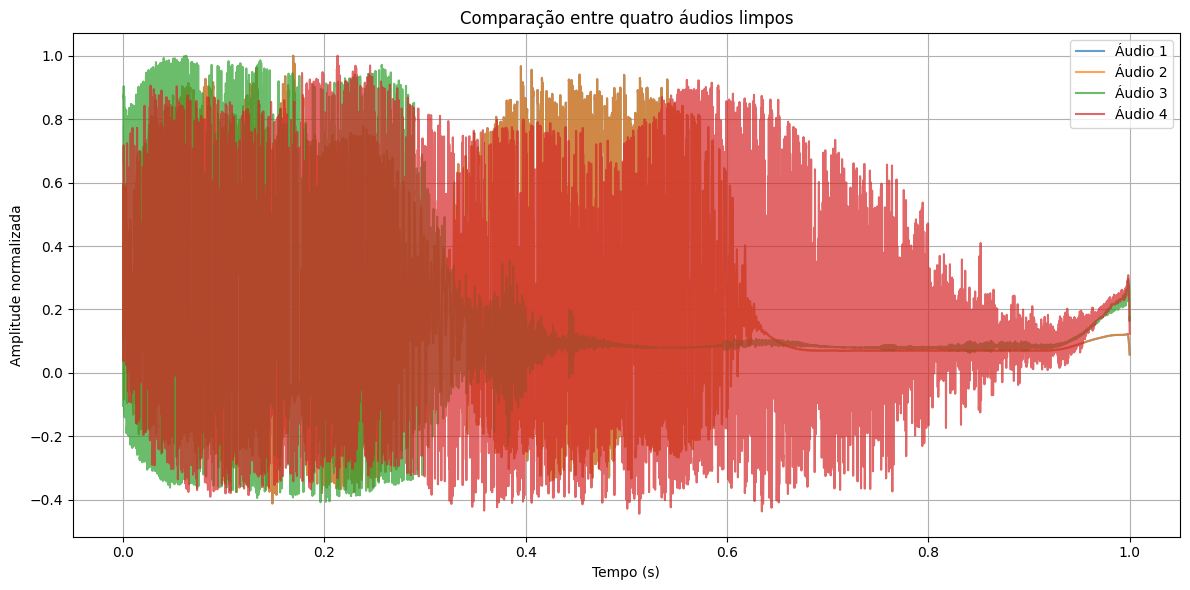

In [74]:
import numpy as np
import matplotlib.pyplot as plt

# Vetor de tempo
tempo = np.linspace(0, min_len / sr1, min_len)

# Gr√°fico
plt.figure(figsize=(12, 6))
plt.plot(tempo, audio1, label="√Åudio 1", alpha=0.7)
plt.plot(tempo, audio2, label="√Åudio 2", alpha=0.7)
plt.plot(tempo, audio3, label="√Åudio 3", alpha=0.7)
plt.plot(tempo, audio4, label="√Åudio 4", alpha=0.7)

# Personaliza√ß√£o
plt.title("Compara√ß√£o entre quatro √°udios limpos")
plt.xlabel("Tempo (s)")
plt.ylabel("Amplitude normalizada")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


RMS (Root Mean Square) e Correla√ß√£o cruzada

Lista os audios, utiliza uma fun√ß√£o realizar a compara√ß√£o.
**RMS:** mede a diferen√ßa m√©dia entre os audios (diferen√ßa de conte√∫do)
**corr:** mede o alinhamento entre os padr√µes dos sinais(semelhan√ßa de forma)

Voc√™ obt√©m uma tabela informal com:

*   Quais √°udios s√£o mais semelhantes
*   Quais t√™m padr√µes temporais parecidos
*   Quais s√£o diferentes em conte√∫do ou forma

In [75]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import wavfile
from scipy.signal import correlate


In [76]:
import numpy as np
from scipy.signal import correlate

# Lista de √°udios
audios = [audio1, audio2, audio3, audio4]
nomes = ["√Åudio 1", "√Åudio 2", "√Åudio 3", "√Åudio 4"]

# Fun√ß√£o para calcular RMS e correla√ß√£o
def comparar(a1, a2):
    rms = np.sqrt(np.mean((a1 - a2) ** 2))
    corr = np.max(correlate(a1, a2, mode='valid'))
    return rms, corr

# Loop para comparar todos os pares
for i in range(len(audios)):
    for j in range(i + 1, len(audios)):
        rms_diff, similaridade = comparar(audios[i], audios[j])
        print(f"üìä RMS entre {nomes[i]} e {nomes[j]}: {rms_diff:.4f}")
        print(f"üîó Correla√ß√£o entre {nomes[i]} e {nomes[j]}: {similaridade:.4f}\n")


üìä RMS entre √Åudio 1 e √Åudio 2: 0.0000
üîó Correla√ß√£o entre √Åudio 1 e √Åudio 2: 2306.7241

üìä RMS entre √Åudio 1 e √Åudio 3: 0.3878
üîó Correla√ß√£o entre √Åudio 1 e √Åudio 3: 570.9784

üìä RMS entre √Åudio 1 e √Åudio 4: 0.4266
üîó Correla√ß√£o entre √Åudio 1 e √Åudio 4: 694.0423

üìä RMS entre √Åudio 2 e √Åudio 3: 0.3878
üîó Correla√ß√£o entre √Åudio 2 e √Åudio 3: 570.9784

üìä RMS entre √Åudio 2 e √Åudio 4: 0.4266
üîó Correla√ß√£o entre √Åudio 2 e √Åudio 4: 694.0423

üìä RMS entre √Åudio 3 e √Åudio 4: 0.3595
üîó Correla√ß√£o entre √Åudio 3 e √Åudio 4: 583.4856



ESPECTOGRAMAS

matplotlib.pyplot: para criar gr√°ficos, wavfile: para ler arquivos .wav, spectrogram: para calcular o espectrograma (frequ√™ncia vs tempo).

Assim, esta fun√ß√£o cria uma figura com quatro espectrogramas lado a lado, permitindo comparar: Frequ√™ncia dominante, Varia√ß√£o temporal e Intensidade espectral

In [82]:
import matplotlib.pyplot as plt
from scipy.io import wavfile
from scipy.signal import spectrogram

def mostrar_espectrogramas(paths):
    plt.figure(figsize=(14, 10))

    for i, path in enumerate(paths, 1):
        sr, audio = wavfile.read(path)
        audio = audio / np.max(np.abs(audio))  # Normaliza
        f, t, Sxx = spectrogram(audio, sr)

        plt.subplot(2, 2, i)
        plt.pcolormesh(t, f, 10 * np.log10(Sxx), shading='gouraud')
        plt.title(f"Espectrograma de {path}")
        plt.ylabel('Frequ√™ncia (Hz)')
        plt.xlabel('Tempo (s)')
        plt.colorbar(label='Intensidade (dB)')
        plt.tight_layout()

    plt.suptitle("Compara√ß√£o de espectrogramas dos 4 √°udios", fontsize=16)
    plt.subplots_adjust(top=0.92)
    plt.show()


/tmp/ipython-input-3446303364.py:14: RuntimeWarning: divide by zero encountered in log10
  plt.pcolormesh(t, f, 10 * np.log10(Sxx), shading='gouraud')


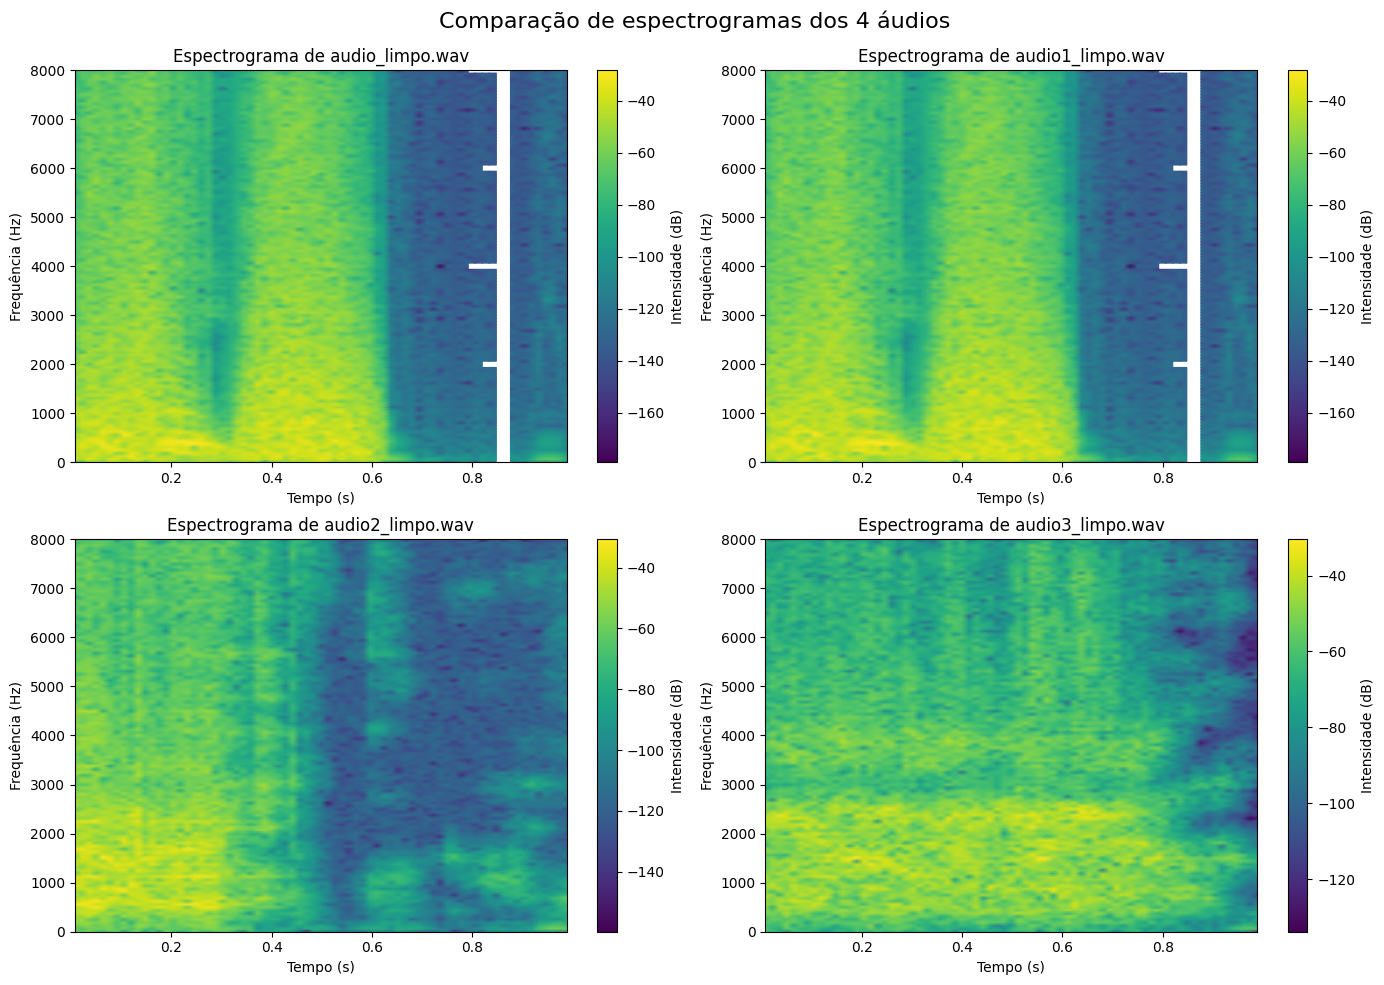

In [83]:
arquivos = [
    "audio_limpo.wav",
    "audio1_limpo.wav",
    "audio2_limpo.wav",
    "audio3_limpo.wav"
]

mostrar_espectrogramas(arquivos)


CLASSIFICA√á√ïES DOS ESPECTOGRAMAS

In [85]:
import numpy as np
from scipy.io import wavfile
from scipy.signal import spectrogram

def tipo_de_som(audio_path):
    sr, audio = wavfile.read(audio_path)
    audio = audio / np.max(np.abs(audio))  # Normaliza

    # Calcula espectrograma
    f, t, Sxx = spectrogram(audio, sr)
    Sxx_db = 10 * np.log10(Sxx + 1e-10)  # Evita log(0)

    # M√©dia de intensidade por faixa de frequ√™ncia
    intensidade_media = np.mean(Sxx_db, axis=1)
    freq_dominante = f[np.argmax(intensidade_media)]

    # Heur√≠stica baseada na frequ√™ncia dominante
    if freq_dominante < 300:
        tipo = "Som grave (ex: corda de viol√£o grave, batida)"
    elif 300 <= freq_dominante < 1500:
        tipo = "Som m√©dio (ex: voz humana, corda m√©dia)"
    elif freq_dominante >= 1500:
        tipo = "Som agudo (ex: assobio, apito, corda aguda)"
    else:
        tipo = "Som indefinido"

    print(f"üîç {audio_path}: Frequ√™ncia dominante ‚âà {freq_dominante:.1f} Hz ‚Üí {tipo}")


In [86]:
arquivos = [
    "audio_limpo.wav",
    "audio1_limpo.wav",
    "audio2_limpo.wav",
    "audio3_limpo.wav"
]

for arquivo in arquivos:
    tipo_de_som(arquivo)


üîç audio_limpo.wav: Frequ√™ncia dominante ‚âà 62.5 Hz ‚Üí Som grave (ex: corda de viol√£o grave, batida)
üîç audio1_limpo.wav: Frequ√™ncia dominante ‚âà 62.5 Hz ‚Üí Som grave (ex: corda de viol√£o grave, batida)
üîç audio2_limpo.wav: Frequ√™ncia dominante ‚âà 1125.0 Hz ‚Üí Som m√©dio (ex: voz humana, corda m√©dia)
üîç audio3_limpo.wav: Frequ√™ncia dominante ‚âà 1500.0 Hz ‚Üí Som agudo (ex: assobio, apito, corda aguda)
